# Boid-Predator Simulation with RAG
This notebook runs the complete simulation pipeline:<br>
<br>
    1. Setup and environment check<br>
    2. Generate synthetic data<br>
    3. Create and populate vector stores<br>
    4. Run the simulation

In [2]:
# Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import chromadb
from langchain_openai import OpenAIEmbeddings
import pandas as pd
import time

# Load environment variables
load_dotenv()

# Check OpenAI API key
api_key = os.getenv('OPENAI_API_KEY')
if not api_key:
    raise ValueError("Please set OPENAI_API_KEY in your .env file")

## 1. Setup Directories and Generate Synthetic Data

In [3]:
# Create required directories if they don't exist
data_dirs = [
    'flock_data',
    'predator_data', 
    'vector_stores'
]

for dir_path in data_dirs:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        print(f"Created directory: {dir_path}")
    else:
        print(f"Directory already exists: {dir_path}")

# Run synthetic data generation
print("\nGenerating synthetic data...")

import synthetic_data_generation

# Defaults to 3 for test-runs, change to 50 for better results
synthetic_data_generation.main(num_generations=3)

Directory already exists: flock_data
Directory already exists: predator_data
Directory already exists: vector_stores

Generating synthetic data...
Generating 3 flock-predator interaction datasets...

Generating dataset 1/3
Creating collections:
- Flock: flock_collection_20250226_140332
- Predator: predator_collection_20250226_140332
Saved flock data to flock_data\flock_predator_data_20250226_140332.csv
Saved predator data to predator_data\predator_path_20250226_140332.csv
Successfully stored dataset 1 in vector stores
Verifying storage:
- Flock collection count: 1
- Predator collection count: 1

Generating dataset 2/3
Creating collections:
- Flock: flock_collection_20250226_140345
- Predator: predator_collection_20250226_140345
Saved flock data to flock_data\flock_predator_data_20250226_140345.csv
Saved predator data to predator_data\predator_path_20250226_140345.csv
Successfully stored dataset 2 in vector stores
Verifying storage:
- Flock collection count: 1
- Predator collection coun

## 2. Baseline Boid Flock with Predator 


Running baseline flock animation...
Saved 500 timesteps of boid data to boid_data.csv
First position: timestep=0, x=791.1, y=179.0, vx=2.1, vy=7.9
Creating animation with 500 frames
['frame', 0]
['frame', 0]


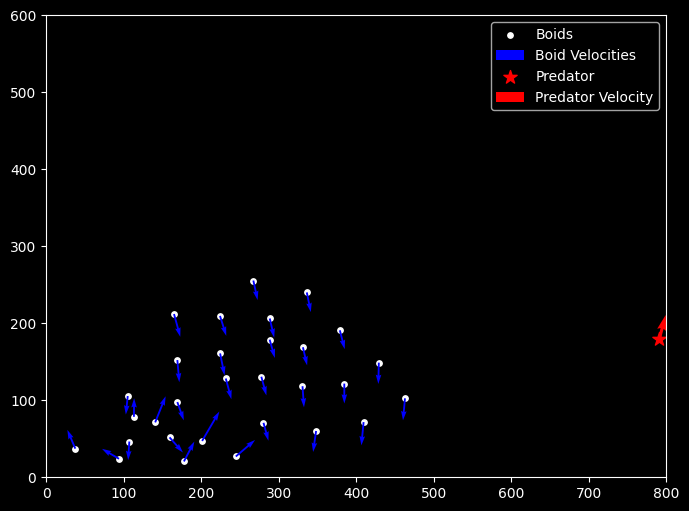

In [5]:
# Run baseline animation
print("\nRunning baseline flock animation...")
import baseline_flock_animation

# Run animation with default parameters
baseline_flock_animation.main()

## 3. RAG Adaptive Flock with Predator

In [ ]:
# Run RAG-enhanced adaptive flock animation
print("\nRunning RAG-enhanced adaptive flock animation...")
import adaptation
adaptation.main()

## 4. Example Adaptive Flock with Predator

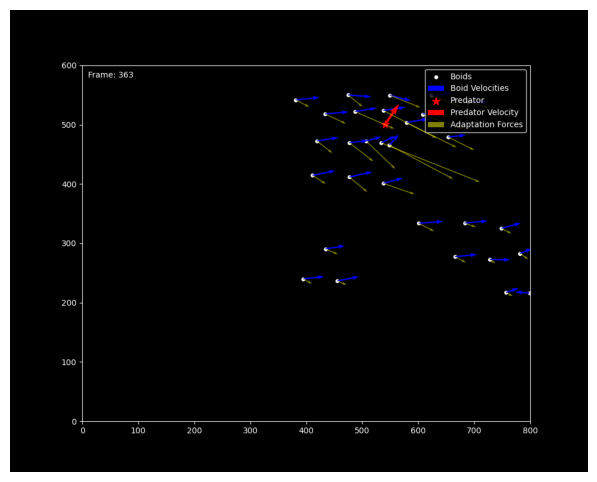

In [1]:
# load adaptive_flock screenshot
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
img = Image.open('adaptive_flock.png')
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()
